#Presentación

**Segunda Entrega Machine Learning**

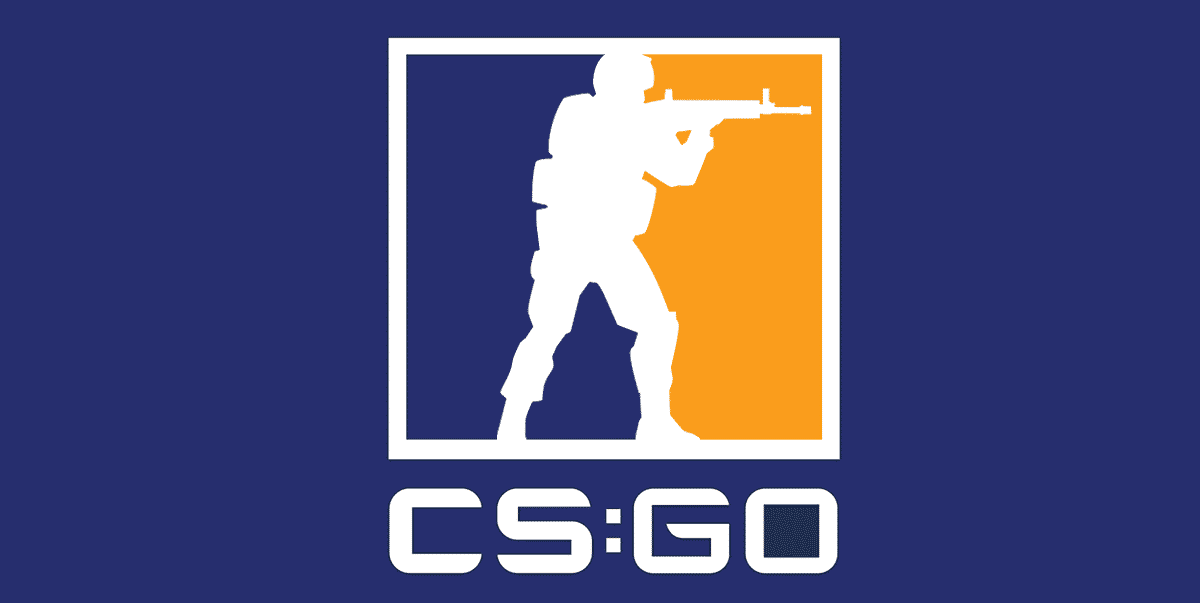

En este trabajo analizaremos datos extraidos de partidas jugadas del videojuego Counter Strike. 

Los integrantes del grupo son: 

*   Agustín González
*   Alonso González
*   Sebastián Letelier

Sección 003D

Profesor: 

*   GUILLERMO EUGENIO PINTO FUENTES.

# Fase de Selección y Preparación


In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
dfRaw = pd.read_csv(name, sep=";")

In [ ]:
url = 'https://raw.githubusercontent.com/seba000/csv_csgo_entrega2/main/Anexo%20Forma%20B_demo_round_traces.csv'
dfRaw = pd.read_csv(url, sep=";")

Primero que todo vemos la informacion general de nuestro dataframe, los nulos y el tipo de dato

In [ ]:
dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79157 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   SteamId                      79157 non-null  int64  
 7   RoundWinner                  79157 non-null  bool   
 8   MatchWinner                  79157 non-null  bool   
 9   Survived                     79157 non-null  bool   
 10  AbnormalMatch                79157 non-null  bool   
 11  TimeAlive                    79157 non-null  float64
 12  ScaledTimeAlive              79157 non-null  float64
 13  AvgCentroidDista

# Fase de Preprocesamiento y Transformación

Luego eliminamos las columnas irrelevantes en nuestra investigacion.

In [ ]:
df=dfRaw.drop(columns=['InternalTeamId','MatchId','Unnamed: 0','RoundId','RoundWinner','Team','Map','RoundStartingEquipmentValue','Survived','AvgMatchKillDist','AvgMatchKillDist','MatchFlankKills','RoundFlankKills','RoundHeadshots','RoundAssists','RoundKills','FirstKillTime','PrimaryPistol','PrimarySMG','PrimaryHeavy','PrimarySniperRifle','PrimaryAssaultRifle','RNonLethalGrenadesThrown','RLethalGrenadesThrown','AvgSiteDistance','AvgKillDistance','AvgRoundVelocity','AvgCentroidDistance','ScaledTimeAlive','AbnormalMatch','SteamId'])

Transformamos los datos de boolean str a boolean int, en este caso queda numero de 0 y 1

In [ ]:
df["MatchWinner"] = df["MatchWinner"].astype(int) #0=False 1=True

separamos nuestros datos en X e Y, donde Y contiene nuestra respuesta y X las variables que utilizara el modelo.

In [ ]:
X=df.drop("MatchWinner",axis=1)

In [ ]:
y=df["MatchWinner"]

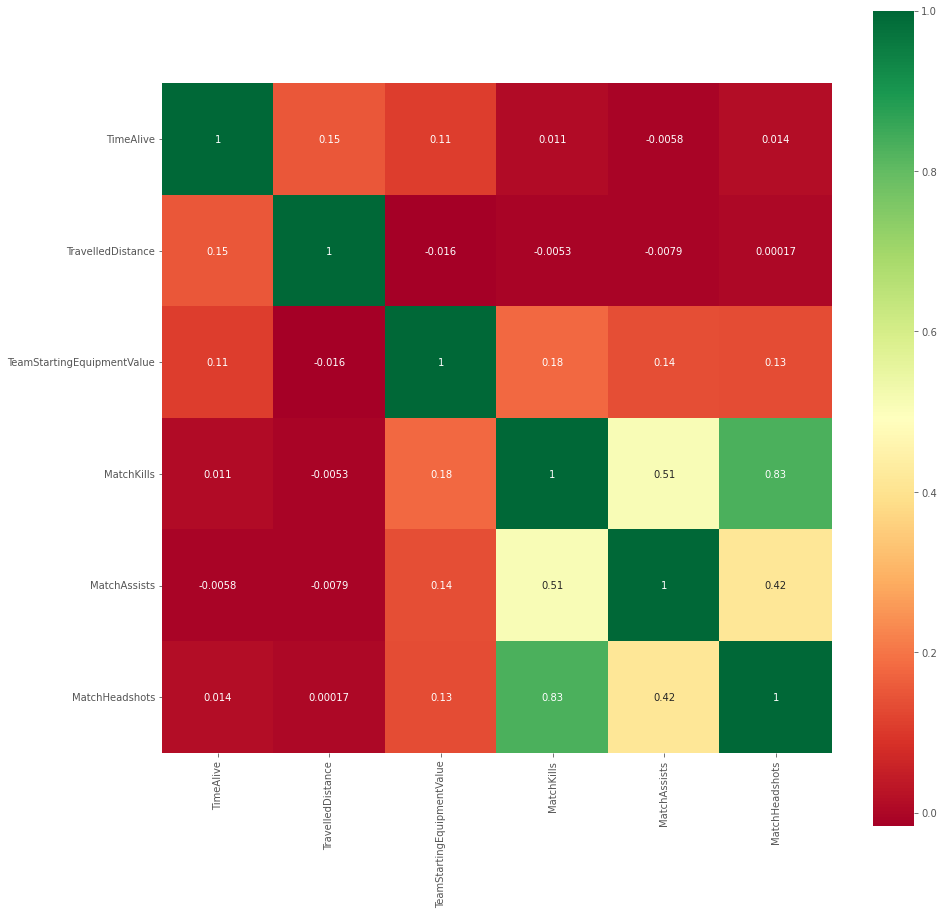

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
p=sns.heatmap(X.corr(), annot=True,cmap='RdYlGn',square=True)

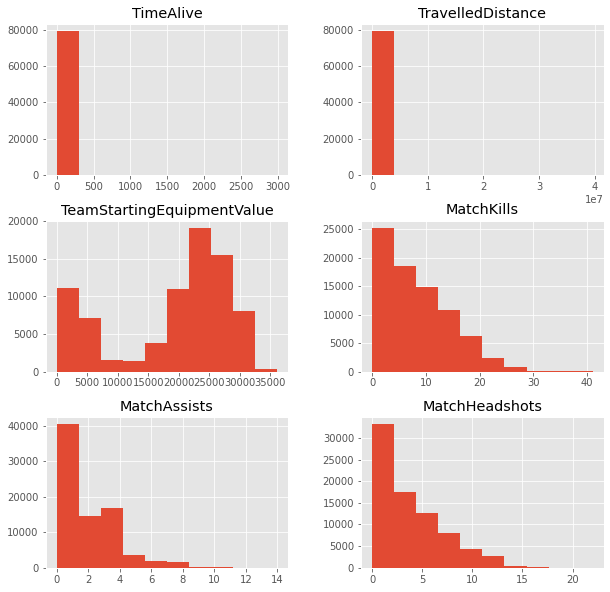

In [ ]:
p = X.hist(figsize = (10,10))

In [ ]:
#X[['TimeAlive','TraveledDistance','TeamStartingEquipmentValue','MatchKills','MatchAssists','MatchHeadshots']] = X[['TimeAlive','TraveledDistance','TeamStartingEquipmentValue','MatchKills','MatchAssists','MatchHeadshots']].replace(0,np.NaN)
#print(X.isnull().sum())

In [ ]:
#X['MatchHeadshots'].fillna(X['MatchHeadshots'].median(), inplace = True)
#X['MatchKills'].fillna(X['MatchKills'].median(), inplace = True)
#X['MatchAssists'].fillna(X['MatchAssists'].median(), inplace = True)
#X['TimeAlive'].fillna(X_copy['TimeAlive'].median(), inplace = True)
#X['TraveledDistance'].fillna(X_copy['TraveledDistance'].median(), inplace = True)


En este caso al descontar los 0 nos quita correlacion

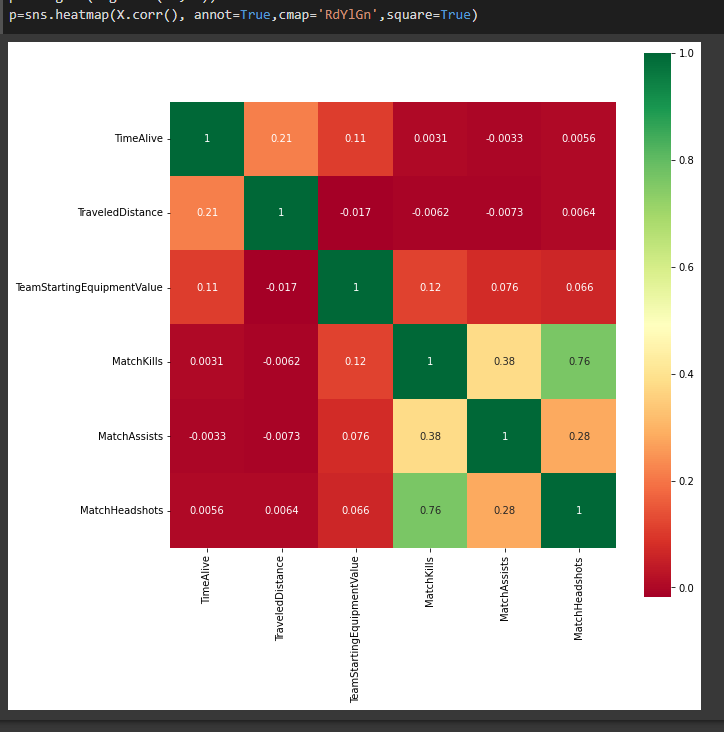

Se escalan los datos, en este caso minmaxscaler, ya que los graficos no distribuyen de forma normal, por lo tanto MinMax es el escalado mas apropiado

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data)
X.columns = ['TimeAlive','TraveledDistance','TeamStartingEquipmentValue','MatchKills','MatchAssists','MatchHeadshots']
X

,TimeAlive,TraveledDistance,TeamStartingEquipmentValue,MatchKills,MatchAssists,MatchHeadshots
0,0.017094,0.002543,0.121715,0.000000,0.000000,0.000000
1,0.014541,0.001538,0.121715,0.000000,0.000000,0.000000
2,0.012491,0.001423,0.121715,0.000000,0.000000,0.000000
3,0.015943,0.002261,0.121715,0.000000,0.000000,0.000000
4,0.017763,0.002741,0.121715,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
79152,0.011378,0.001021,0.749654,0.097561,0.142857,0.090909
79153,0.009784,0.000811,0.749654,0.195122,0.071429,0.136364
79154,0.019778,0.001515,0.749654,0.121951,0.142857,0.136364
79155,0.014239,0.000706,0.749654,0.024390,0.071429,0.000000


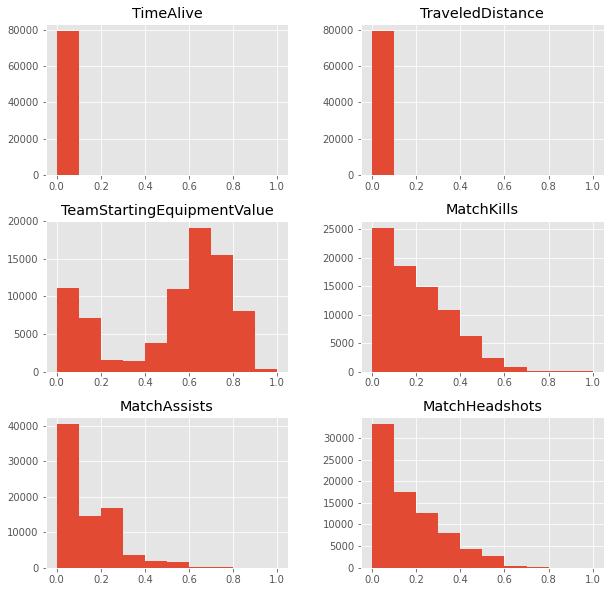

In [ ]:
p = X.hist(figsize = (10,10))

In [ ]:
#X['TraveledDistance'] = X['TraveledDistance']*100
#X['TimeAlive'] = X['TimeAlive']*10


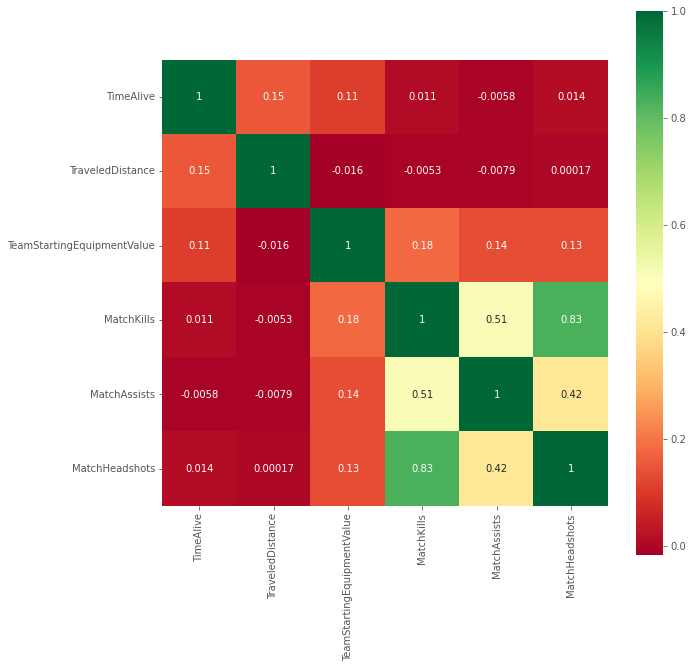

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
p=sns.heatmap(X.corr(), annot=True,cmap='RdYlGn',square=True)

Vemos que lo datos no cambian mucho, aun asi procederemos con nuestros datos escalados

Mostramos la cantidad de respuestas segun su valor(0-1) para verificar la diferencia entre los datos de salida y evaluar cual es el mejor modelo para este caso

0    42018
1    37139
Name: MatchWinner, dtype: int64


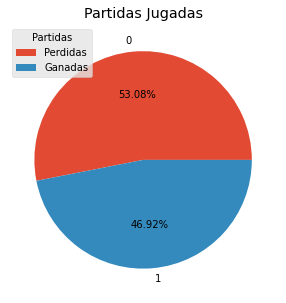

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pie(x=df['MatchWinner'].value_counts(),labels=df['MatchWinner'].value_counts().index, autopct='%0.2f%%')
plt.title("Partidas Jugadas")
plt.legend(title="Partidas",labels=["Perdidas","Ganadas"], loc=2)
print(df.MatchWinner.value_counts())
plt.show()

# Fase de Minería de Datos



---

## Algoritmo de Clasificación

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)
y

0        1
1        1
2        1
3        1
4        1
        ..
79152    0
79153    0
79154    0
79155    0
79156    0
Name: MatchWinner, Length: 79157, dtype: int64

### Arboles de Decisión

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
modelo = DecisionTreeClassifier(random_state=29)

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

Text(0.5, 15.0, 'Predicted label')

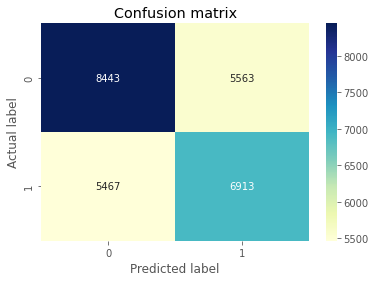

In [ ]:
#MATRIZ DE CONFUSIÓN
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#METRICAS
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.60      0.60     14006
           1       0.55      0.56      0.56     12380

    accuracy                           0.58     26386
   macro avg       0.58      0.58      0.58     26386
weighted avg       0.58      0.58      0.58     26386



In [ ]:
#CURVA ROC
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, y_pred)
print(roc_value)

0.5806068631560395


### Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier

modelo3 = RandomForestClassifier(n_estimators=100, class_weight="balanced",
                               max_features = 'sqrt', verbose=2, max_depth=15,
                               oob_score=True, random_state=50)

modelo3.fit(X_train, y_train)
y_pred_rf = modelo3.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


Text(0.5, 15.0, 'Predicted label')

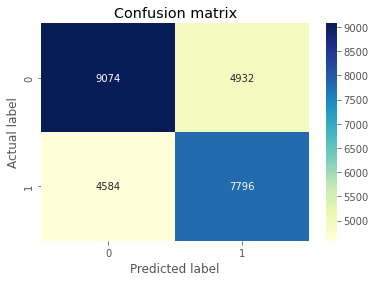

In [ ]:
#Matriz de Confusión
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66     14006
           1       0.61      0.63      0.62     12380

    accuracy                           0.64     26386
   macro avg       0.64      0.64      0.64     26386
weighted avg       0.64      0.64      0.64     26386



### Gradient Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV



model = GradientBoostingClassifier()

params = {"n_estimators": [15],
          "max_depth": [4,5], 
          "min_samples_split": [2,3,4], 
          "max_leaf_nodes": [5,8]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Yhat = grid.predict(X_test)
print(confusion_matrix(y_test, Yhat))
print(classification_report(y_test, Yhat))

[[9184 4822]
 [5221 7159]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65     14006
           1       0.60      0.58      0.59     12380

    accuracy                           0.62     26386
   macro avg       0.62      0.62      0.62     26386
weighted avg       0.62      0.62      0.62     26386





---



## Algoritmo de Regresión

In [ ]:
#imports
from seaborn import load_dataset
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#subir archivo desde tu pc
from google.colab import files
uploaded = files.upload()
low_memory=False
for fn in uploaded.keys():
  name=fn
df=pd.read_csv(name,sep=';')

In [ ]:
#o bien cargamos el dataset desde la web
url = 'https://raw.githubusercontent.com/seba000/csv_csgo_entrega2/main/Anexo%20Forma%20B_demo_round_traces.csv'
df = pd.read_csv(url, sep=";")

In [ ]:
#nos vamos familiarizando con la data visualizandola
df.head(90).T

In [ ]:
df.describe().T

### 1er modelo de Regresión

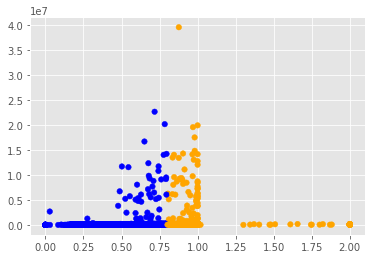

In [ ]:
#para visualizar las variables de entrada
colores=['orange','blue']
tamanios=[30,60]

f1 = df['ScaledTimeAlive'].values
f2 = df['TravelledDistance'].values

#pintar en dos los puntos debajo de la media del TimeAllive
asignar=[]
for index, row in df.iterrows():
    if(row['ScaledTimeAlive']>0.8):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

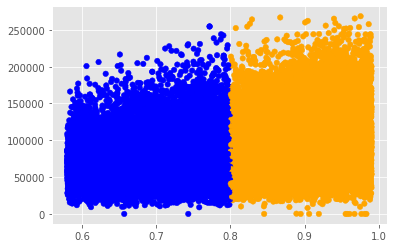

In [ ]:
# recortar en la zona donde se concentran los datos 
# eje X: entre 0.58 y 1
# eje Y: entre 0 y 280.000
filtered_data = df[(df['ScaledTimeAlive'] >=0.58 ) & (df['ScaledTimeAlive'] <=0.99 ) & (df['TravelledDistance'] <= 280000)]

f1 = filtered_data['ScaledTimeAlive'].values
f2 = filtered_data['TravelledDistance'].values

#pintar en dos los puntos debajo de la media del TimeAllive
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['ScaledTimeAlive']>0.8):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [ ]:
#Cambian los valores de la característica 'ScaledTimeAlive' una vez filtrada
filtered_data['ScaledTimeAlive'].describe()

count    34593.000000
mean         0.806965
std          0.115401
min          0.580000
25%          0.710444
50%          0.818037
75%          0.907819
max          0.989980
Name: ScaledTimeAlive, dtype: float64

In [ ]:
#Asimismo, los valores de la característica 'TravelledDistance' tambien cambiaron una vez filtrada
filtered_data['TravelledDistance'].describe()

count     34593.000000
mean      90216.737729
std       39579.718064
min           0.000000
25%       60842.432462
50%       84520.625319
75%      114103.167512
max      268518.192213
Name: TravelledDistance, dtype: float64

In [ ]:
# Asignamos nuestra variable de entrada X e y para entrenamiento
dataX =filtered_data[["ScaledTimeAlive"]]
X_train = np.array(dataX)
y_train = filtered_data['TravelledDistance'].values

In [ ]:
# llamamos a la Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva serán una línea al ser solo 2 dimensiones
y_pred = regr.predict(X_train)

# Error Cuadratico Medio
print("Mean squared error (error cuadratico medio): %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score (R2 Score): %.2f' % r2_score(y_train, y_pred))

Mean squared error (error cuadratico medio): 1447514183.00
Variance score (puntaje de varianza): 0.08


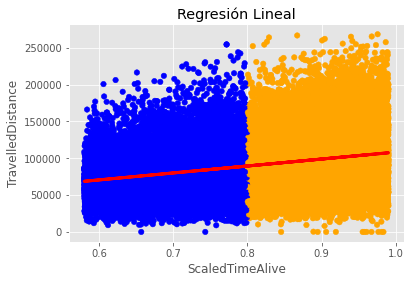

In [ ]:
#Visualizamos la recta que obtuvimos
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('ScaledTimeAlive')
plt.ylabel('TravelledDistance')
plt.title('Regresión Lineal')

plt.show()

In [ ]:
#Predicción
# Queremos predecir cuanta distancia va a recorrer un jugador con un tiempo (escalado) estando vivo de 0.9
# Y según nuestro modelo,:
y_puntoNueve = regr.predict([[0.9]])
print(int(y_puntoNueve))

99011


####  1era Regresión Múltiple

In [ ]:
#Integramos una dimension más al modelo
#sumamos dos variables en una sola que se convertira en nuestra tercera variable
suma = (filtered_data["AvgSiteDistance"] + filtered_data['TeamStartingEquipmentValue'].fillna(0))

dataX2 =  pd.DataFrame()
dataX2["ScaledTimeAlive"] = filtered_data["ScaledTimeAlive"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['TravelledDistance'].values

In [ ]:
# llamamos a la Regresión Linear
regr2 = linear_model.LinearRegression()

# Entrenamos modelo
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Error cuadrático medio
print("Mean squared error (error cuadratico medio): %.2f" % mean_squared_error(z_train, z_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score (R2 score): %.2f' % r2_score(z_train, z_pred))

Mean squared error (error cuadratico medio): 1442832622.17
Variance score (R2 score): 0.08


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

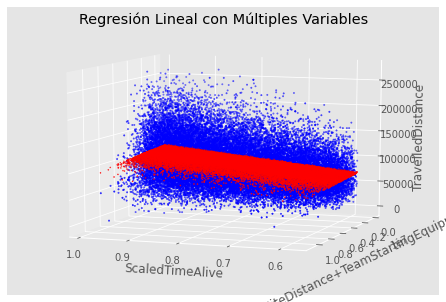

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

xx, yy = np.meshgrid(np.linspace(0.58,0.61, num=10), np.linspace(0, 5, num=10))
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=2)

# Graficamos en rojo la tercera caracteristica
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=1)

# con esto movemos el punto de vista
ax.view_init(elev=10., azim=110)
        
ax.set_xlabel('ScaledTimeAlive')
ax.set_ylabel('AvgSiteDistance+TeamStartingEquipmentValue')
ax.set_zlabel('TravelledDistance')
ax.set_title('Regresión Lineal con Múltiples Variables')

In [ ]:
# Calculamos la varianza ahora con la tercera variable en la regresión:
Varianza = r2_score(z_train, z_pred) - r2_score(y_train, y_pred)
print(Varianza)

0.0029885314605451185


### 2do modelo de Regresión

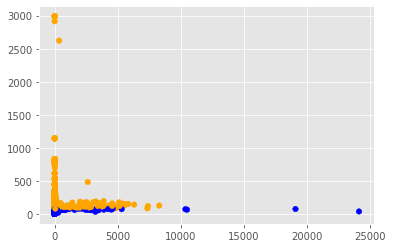

In [ ]:
colores2=['orange','blue']
tamanios2=[30,60]

f12 = df['AvgRoundVelocity'].values
f22 = df['TimeAlive'].values

asignar2=[]
for index, row in df.iterrows():
    if(row['TimeAlive']>80):
        asignar2.append(colores2[0])
    else:
        asignar2.append(colores2[1])
    
plt.scatter(f12, f22, c=asignar2, s=tamanios2[0])
plt.show()

In [ ]:
# recortar en la zona donde se concentran los datos 
# eje X: entre 0 y 200
# eje Y: entre 0 y 160
filtered_data2 = df[(df['AvgRoundVelocity'] <=200 ) & (df['TimeAlive'] <= 160)]

f12 = filtered_data2['AvgRoundVelocity'].values
f22 = filtered_data2['TimeAlive'].values

for index, row in filtered_data2.iterrows():
    if(row['TimeAlive']>80):
        asignar2.append(colores2[0])
    else:
        asignar2.append(colores2[1])

In [ ]:
#Cambian los valores de la característica 'AvgRoundVelocity' una vez filtrada
filtered_data2['AvgRoundVelocity'].describe()

count    78442.000000
mean        80.350135
std         33.378024
min          0.000000
25%         57.124022
50%         83.903947
75%        104.202369
max        198.282075
Name: AvgRoundVelocity, dtype: float64

In [ ]:
#Asimismo, los valores de la característica 'TimeAlive' tambien cambiaron una vez filtrada
filtered_data2['TimeAlive'].describe()

count    78442.000000
mean        70.805557
std         28.628699
min          0.000000
25%         46.905131
50%         68.842586
75%         92.054315
max        159.827064
Name: TimeAlive, dtype: float64

In [ ]:
# Asignamos nuestra variable de entrada X e y para entrenamiento
dataX2 =filtered_data2[['AvgRoundVelocity']]
X_train2 = np.array(dataX2)
y_train2 = filtered_data2[['TimeAlive']].values

In [ ]:
# llamamos la funcion de Regresión Linear
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo
regr2.fit(X_train2, y_train2)

# Hacemos las predicciones
y_pred2 = regr2.predict(X_train2)

# Error Cuadrado Medio
print("Mean squared error (error cuadratico medio): %.2f" % mean_squared_error(y_train2, y_pred2))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score (r2 score): %.2f' % r2_score(y_train2, y_pred2))

Mean squared error (error cuadratico medio): 806.33
Variance score (r2 score): 0.02


In [ ]:
#Predicción 1
#Vamos a comprobar:
# Quiero predecir qué velocidad tendrá un jugador con un tiempo vivo de 80
# según nuestro modelo, hacemos:
y_ochenta = regr2.predict([[80]])
print(int(y_ochenta))

70


In [ ]:
#Integramos una dimension más al modelo
suma2 = (filtered_data2["TravelledDistance"])

dataX2 =  pd.DataFrame()
dataX2["AvgRoundVelocity"] = filtered_data2["AvgRoundVelocity"]
dataX2["suma"] = suma2
XY_train2 = np.array(dataX2)
z_train2 = filtered_data2['TimeAlive'].values

In [ ]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train2, z_train2)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred2 = regr2.predict(XY_train2)

# Error cuadrático medio
print("Mean squared error (error cuadratico medio): %.2f" % mean_squared_error(z_train2, z_pred2))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score (R2 score): %.2f' % r2_score(z_train2, z_pred2))

Mean squared error (error cuadratico medio): 121.57
Variance score (R2 score): 0.85


####  2da Regresion Múltiple

Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

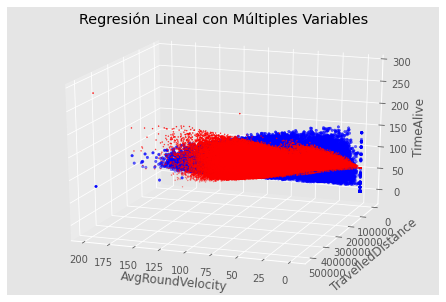

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0.58,0.61, num=10), np.linspace(0, 5, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX2 = (regr2.coef_[0] * xx)
nuevoY2 = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z2 = (nuevoX2 + nuevoY2 + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z2, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train2[:, 0], XY_train2[:, 1], z_train2, c='blue',s=6)

# Graficamos en rojo, los puntos que 
ax.scatter(XY_train2[:, 0], XY_train2[:, 1], z_pred2, c='red',s=1)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=20, azim=110)
        
ax.set_xlabel('AvgRoundVelocity')
ax.set_ylabel('TravelledDistance')
ax.set_zlabel('TimeAlive')
ax.set_title('Regresión Lineal con Múltiples Variables')

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train2, y_pred2)

23.716469644924942

In [ ]:
# También calculamos la mejora en la varianza:
mejoraEnVarianza2 = r2_score(z_train2, z_pred2) - r2_score(y_train2, y_pred2)
print(mejoraEnVarianza2)
# Aunque no parezca mucho, recordemos que el valor más alto que se puede obtener es 1.0

0.8354890718663245


# Fase de Evaluación

## Arboles de Decisión


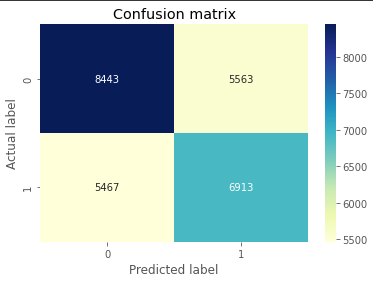

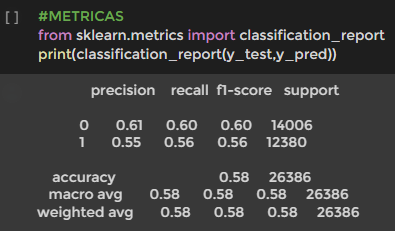

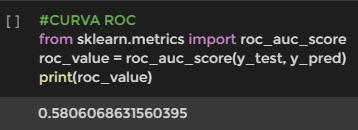

## Random Forest

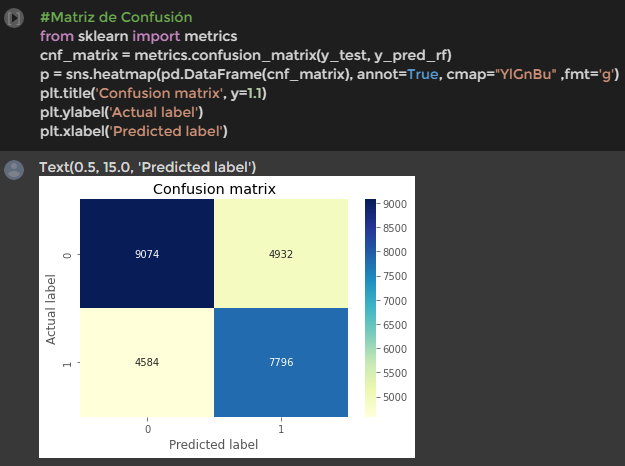

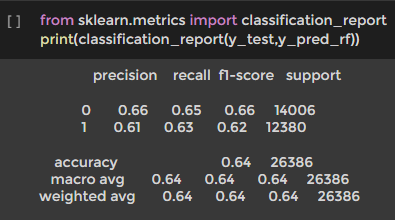

## Gradient Boosting

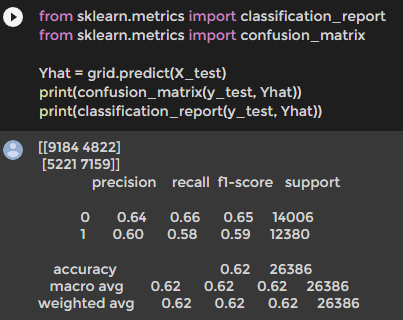

## 1er Modelo de Regresión Simple

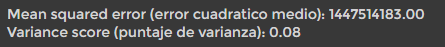

## 1er Modelo de Regresion Multiple

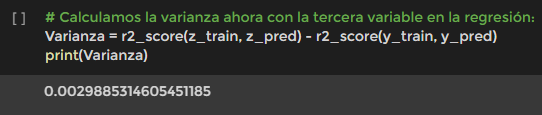

## 2do Modelo de Regresión Simple

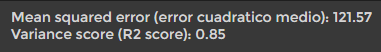

## 2do Modelo de Regresión Multiple

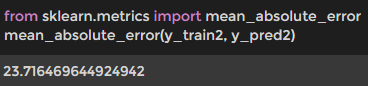

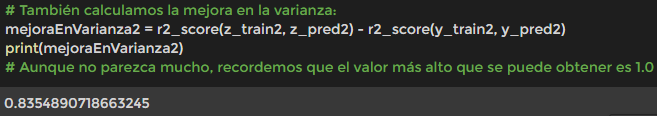